Частота перевищення швидкості за статтю:
 driver_gender
M    32979
F    15482
Name: count, dtype: int64
Частота обшуків за статтю:
 driver_gender
M    0.852628
F    0.147372
Name: proportion, dtype: float64


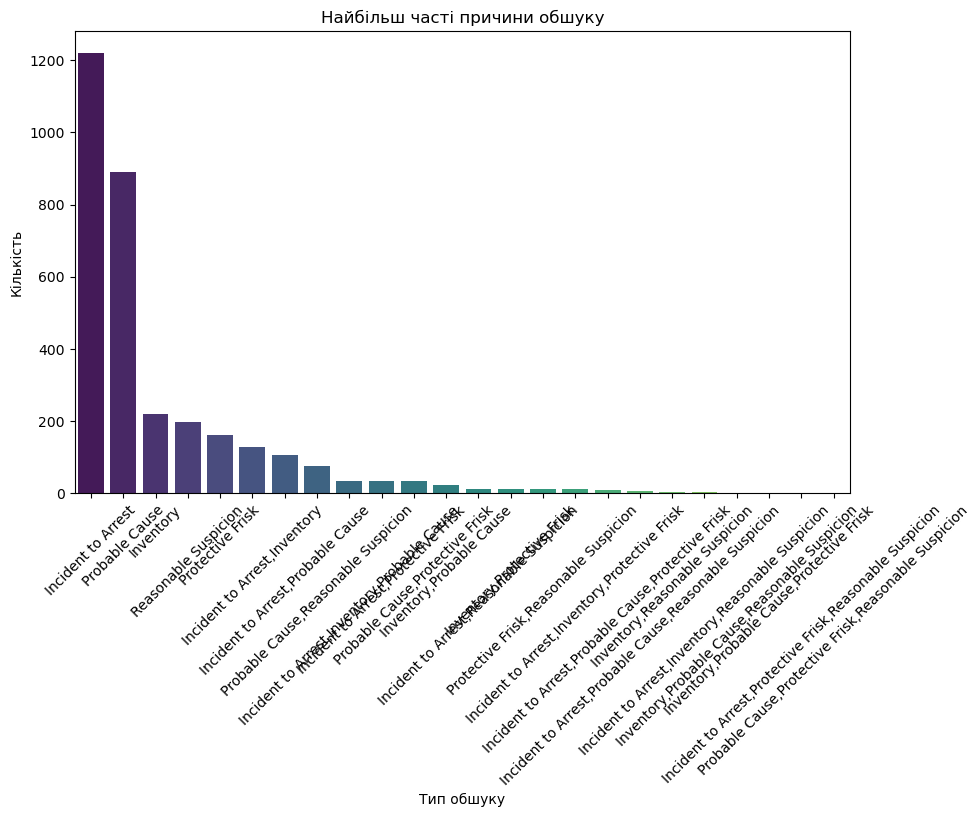

Обшуки (Protective Frisk) проводилися у 161 випадках із 91741
    stop_date stop_time  county_name driver_gender  driver_age_raw  \
0  2005-01-02     01:55          NaN             M          1985.0   
1  2005-01-18     08:15          NaN             M          1965.0   
2  2005-01-23     23:15          NaN             M          1972.0   
3  2005-02-20     17:15          NaN             M          1986.0   
4  2005-03-14     10:00          NaN             F          1984.0   

   driver_age driver_race     violation_raw violation  search_conducted  \
0        20.0       White          Speeding  Speeding             False   
1        40.0       White          Speeding  Speeding             False   
2        33.0       White          Speeding  Speeding             False   
3        19.0       White  Call for Service     Other             False   
4        21.0       White          Speeding  Speeding             False   

  search_type   stop_outcome is_arrested stop_duration  drugs_rela

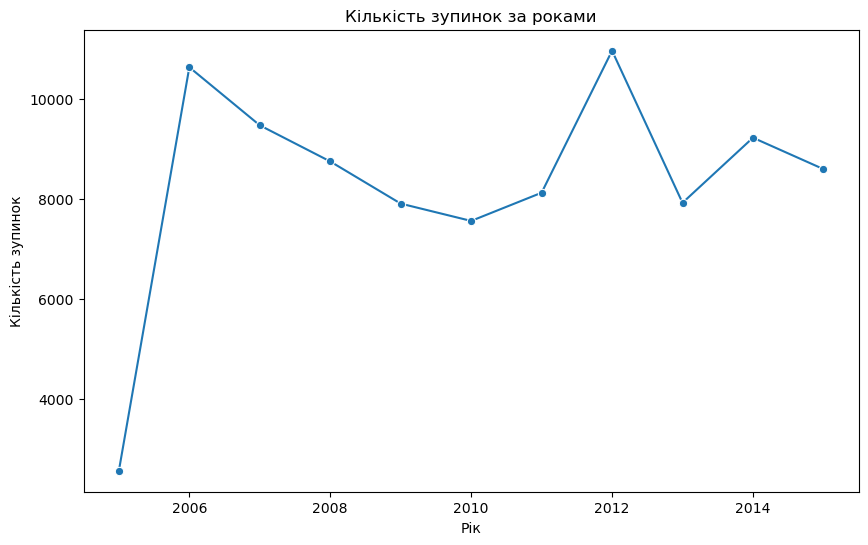

Найменше зупинок водіїв було в 2005 році.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

file_path = 'police_project.csv'
data = pd.read_csv(file_path)
data.replace([float('nan'), -float('nan')], float('nan'), inplace=True)

# 1. З'ясуйте, чоловіки чи жінки частіше перевищують швидкість.
speeding_data = data[data['violation'] == 'Speeding']
speeding_by_gender = speeding_data['driver_gender'].value_counts()
print("Частота перевищення швидкості за статтю:\n", speeding_by_gender)

# 2. Порівняйте, наскільки часто для чоловіків та жінок проводився обшук.
search_data = data[data['search_conducted'] == True]
search_by_gender = search_data['driver_gender'].value_counts(normalize=True)
print("Частота обшуків за статтю:\n", search_by_gender)

# 3. Діаграма найбільш частих причин для оголошення в розшук.
search_type_counts = data['search_type'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=search_type_counts.index, y=search_type_counts.values, palette='viridis')
plt.title('Найбільш часті причини обшуку')
plt.xlabel('Тип обшуку')
plt.ylabel('Кількість')
plt.xticks(rotation=45)
plt.show()

# 4. Частота обшуків (Protective Frisk)
data['frisk'] = data['search_type'] == 'Protective Frisk'
frisk_count = data['frisk'].sum()
total_count = len(data)
print(f"Обшуки (Protective Frisk) проводилися у {frisk_count} випадках із {total_count}")
print(data.head())

# 5. Графік кількості зупинок за роками
data['stop_date'] = pd.to_datetime(data['stop_date'])
data['stop_year'] = data['stop_date'].dt.year
stops_per_year = data['stop_year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=stops_per_year.index, y=stops_per_year.values, marker='o')
plt.title('Кількість зупинок за роками')
plt.xlabel('Рік')
plt.ylabel('Кількість зупинок')
plt.show()

min_stops_year = stops_per_year.idxmin()
print(f"Найменше зупинок водіїв було в {min_stops_year} році.")